<a href="https://colab.research.google.com/github/tlmcintosh/DS4A_Group_61/blob/main/Group_61.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the modules
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
#load our data from csv file on github
df_dash = pd.read_csv("https://raw.githubusercontent.com/tlmcintosh/Group_61_data/main/Dashboard_Team_61_Data.csv")
df_dash.head()
#not the most up-to-date cancer file... update later 03/06/22

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,Arsenic_Avg,CountyFIPS,SVI_Loc,RPL_THEME1_socieconomic,RPL_THEME2_household_composition_and_disability,RPL_THEME3_minority_status_and_language,RPL_THEME4_Housing_type_and_transportation,RPL_THEMES_Social_Vulnerability_Index,%Cancer Prev,...,PP_Lat,PP_Long,Plant primary fuel,AVERAGE of GHG QUANTITY (METRIC TONS CO2e),Days with AQI,Hazardous Days,Max AQI,90th Percentile AQI,Days Ozone,cnty_state
0,4001,3.214286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4003,4.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4005,3.551333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4007,2.581000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4009,3.606000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import seaborn as sns

In [4]:
from pandas.core.algorithms import value_counts
#check for missing values
df_dash["Arsenic_Avg"].isna().value_counts()
#df_dash["CountyFIPS"]
#df_dash["SVI_Loc"]
#df_dash["%Cancer Prev"]
#df_dash["CountyFIPS"]
#df_dash["CountyFIPS"]
#df_dash["CountyFIPS"]
#df_dash["CountyFIPS"]

True     12848
False     1014
Name: Arsenic_Avg, dtype: int64

In [30]:
!pip install addfips

     |████████████████████████████████| 108 kB 4.2 MB/s 


In [ ]:
formula1='Arsenic_Avg ~ %Cancer Prev'
formula1

'Arsenic_Avg ~ %Cancer Prev'

In [ ]:
model1 = sm.ols(formula = formula1, data = df_dash)


AssertionError: ignored

In [11]:
def p2f(x):
    return float(x.strip('%'))/100

In [18]:
#changing % to a decimal 
#step 1: remove the '%'
#df_cancer["Value2"]=float(df_cancer["Value"].str.strip('%'))/100
#In [6]:
df_cancer["Value"] = df_cancer["Value"].str.strip('%')/100
df_cancer.head()
#step 2: Change object to a float
df_cancer["Value"] = df_cancer["Value"].astype(float, errors = 'raise')
df_cancer.dtypes
#step 3: Divide the number by 100 to create a decimal 
df_cancer['Value_Dec']=df_cancer["Value"]/100
df_cancer.head()

TypeError: ignored

In [23]:
#df_cancer.dtypes
df_cancer["Value"] = df_cancer["Value"].astype(float, errors = 'raise')
#print(df_cancer.info)
df_cancer.dtypes #great now "value is a float I can divide by 100"

StateFIPS                     int64
State                        object
CountyFIPS                    int64
County                       object
Year                          int64
Value                       float64
Data Comment                float64
95% Confidence Interval      object
Confidence Interval Low      object
Confidence Interval High     object
Unnamed: 10                 float64
dtype: object

In [24]:
df_cancer['Value_Dec']=df_cancer["Value"]/100
df_cancer.head()

,StateFIPS,State,CountyFIPS,County,Year,Value,Data Comment,95% Confidence Interval,Confidence Interval Low,Confidence Interval High,Unnamed: 10,Value_Dec
0,1,Alabama,1001,Autauga,2018,7.4,NaN,(7.0% - 7.7%),7.0%,7.7%,NaN,0.074
1,1,Alabama,1003,Baldwin,2018,8.5,NaN,(8.1% - 8.9%),8.1%,8.9%,NaN,0.085
2,1,Alabama,1005,Barbour,2018,7.5,NaN,(7.2% - 7.7%),7.2%,7.7%,NaN,0.075
3,1,Alabama,1007,Bibb,2018,7.2,NaN,(6.9% - 7.5%),6.9%,7.5%,NaN,0.072
4,1,Alabama,1009,Blount,2018,8.0,NaN,(7.6% - 8.4%),7.6%,8.4%,NaN,0.080


In [28]:
df_cancer["Confidence Interval Low"] = df_cancer["Confidence Interval Low"].astype(float, errors = 'raise')
#print(df_cancer.info)
df_cancer.dtypes

ValueError: ignored

In [27]:
#with open and f:
def p2f(x):
    return float(x.str.strip('%'))/100
#df_cancer = pd.read_csv ('https://raw.githubusercontent.com/tlmcintosh/Group_61_data/main/data_140444.csv', index_col=[0], converters={"Value":psf})
     #(f, delimiter=',') #import cancer prevalence data
#df_cancer.head()

p2f(df_cancer["Confidence Interval Low"])

TypeError: ignored

In [10]:
df_cancer.dtypes
#df_cancer.head()



StateFIPS                     int64
State                        object
CountyFIPS                    int64
County                       object
Year                          int64
Value                        object
Data Comment                float64
95% Confidence Interval      object
Confidence Interval Low      object
Confidence Interval High     object
Unnamed: 10                 float64
dtype: object

In [9]:
#converting the percentages to decimals 
#strip the percentage
df_cancer['ValueNew']=df_cancer['Value'].str('%')
df_cancer.head()


TypeError: ignored

In [31]:
import addfips
af = addfips.AddFIPS(vintage=2015)
#af_echo_test =df_echo_test.AddFIPS()
#df_echo_test.add_county_fips(row, county_field='FAC_COUNTY', state_field='FAC_STATE')

df_cancer['CountyFIPS'] = df_cancer.apply(
        lambda x: (af.get_county_fips(state=x['State'], county=x['County'])
    if pd.notnull(x['County']) and pd.notnull(x['State'])else pd.NA),
axis=1)
df_cancer.head() ###YAASSSSSS it worked... now we have the correct fips for the powerplants data

,StateFIPS,State,CountyFIPS,County,Year,Value,Data Comment,95% Confidence Interval,Confidence Interval Low,Confidence Interval High,Unnamed: 10,Value_Dec
0,1,Alabama,01001,Autauga,2018,7.4,NaN,(7.0% - 7.7%),7.0%,7.7%,NaN,0.074
1,1,Alabama,01003,Baldwin,2018,8.5,NaN,(8.1% - 8.9%),8.1%,8.9%,NaN,0.085
2,1,Alabama,01005,Barbour,2018,7.5,NaN,(7.2% - 7.7%),7.2%,7.7%,NaN,0.075
3,1,Alabama,01007,Bibb,2018,7.2,NaN,(6.9% - 7.5%),6.9%,7.5%,NaN,0.072
4,1,Alabama,01009,Blount,2018,8.0,NaN,(7.6% - 8.4%),7.6%,8.4%,NaN,0.080


In [32]:
df_cancer.head()
df_cancer['Cnty_ST']=(df_cancer["County"])+', '+(df_cancer["State"])
df_cancer.head()

,StateFIPS,State,CountyFIPS,County,Year,Value,Data Comment,95% Confidence Interval,Confidence Interval Low,Confidence Interval High,Unnamed: 10,Value_Dec,Cnty_ST
0,1,Alabama,01001,Autauga,2018,7.4,NaN,(7.0% - 7.7%),7.0%,7.7%,NaN,0.074,"Autauga, Alabama"
1,1,Alabama,01003,Baldwin,2018,8.5,NaN,(8.1% - 8.9%),8.1%,8.9%,NaN,0.085,"Baldwin, Alabama"
2,1,Alabama,01005,Barbour,2018,7.5,NaN,(7.2% - 7.7%),7.2%,7.7%,NaN,0.075,"Barbour, Alabama"
3,1,Alabama,01007,Bibb,2018,7.2,NaN,(6.9% - 7.5%),6.9%,7.5%,NaN,0.072,"Bibb, Alabama"
4,1,Alabama,01009,Blount,2018,8.0,NaN,(7.6% - 8.4%),7.6%,8.4%,NaN,0.080,"Blount, Alabama"


In [33]:
df_cancer = df_cancer.drop(columns=['StateFIPS','State','County','Year', 'Value','Data Comment','95% Confidence Interval','Confidence Interval Low','Confidence Interval High','Unnamed: 10'])
df_cancer= df_cancer.rename({'Value_Dec':'%Cancer Prev'}, axis=1)
#df_adlt_asthma_18.head()
df_cancer.head()

,CountyFIPS,%Cancer Prev,Cnty_ST
0,01001,0.074,"Autauga, Alabama"
1,01003,0.085,"Baldwin, Alabama"
2,01005,0.075,"Barbour, Alabama"
3,01007,0.072,"Bibb, Alabama"
4,01009,0.080,"Blount, Alabama"


In [34]:
df_powerplants = pd.read_csv('https://raw.githubusercontent.com/tlmcintosh/Group_61_data/main/power_plants%20(1).csv')


In [35]:
import addfips
af = addfips.AddFIPS(vintage=2015)
#af_echo_test =df_echo_test.AddFIPS()
#df_echo_test.add_county_fips(row, county_field='FAC_COUNTY', state_field='FAC_STATE')

df_powerplants['CountyFIPS'] = df_powerplants.apply(
        lambda x: (af.get_county_fips(state=x['Plant state abbreviation'], county=x['Plant county name'])
    if pd.notnull(x['Plant county name']) and pd.notnull(x['Plant state abbreviation'])else pd.NA),
axis=1)
df_powerplants.head() ###YAASSSSSS it worked... now we have the correct fips for the powerplants data

,Unnamed: 0,Plant sequence number,Data Year,Plant state abbreviation,Plant name,Plant transmission or distribution system owner name,Utility ID,Plant FIPS state code,Plant FIPS county code,Plant county name,Latitude,Longitude,Plant primary fuel,Plant primary coal/oil/gas/ other fossil fuel category,CountyFIPS
0,0,1,2019,AK,Sand Point,"TDX Sand Point Generating, LLC",63560,2,13.0,Aleutians East,55.339722,-160.497222,DFO,OIL,02013
1,1,2,2019,AL,Barry,Alabama Power Co,195,1,97.0,Mobile,31.006900,-88.010300,BIT,COAL,01097
2,2,3,2019,AL,Gadsden,Alabama Power Co,195,1,55.0,Etowah,34.012800,-85.970800,NG,GAS,01055
3,3,4,2019,AL,Gorgas,Alabama Power Co,195,1,127.0,Walker,33.644344,-87.196486,BIT,COAL,01127
4,4,5,2019,TX,Copper Station,El Paso Electric Co,5701,48,141.0,El Paso,31.756900,-106.375000,NG,GAS,48141


In [36]:
df_powerplants = df_powerplants.rename({'Latitude':'PP_Lat','Longitude':'PP_Long'},axis=1) #changing the name of the values for the merge

In [37]:
df_powerplants=df_powerplants.drop(columns=['Plant sequence number','Data Year','Utility ID','Plant FIPS county code','Plant FIPS state code'])
df_powerplants.head()

,Unnamed: 0,Plant state abbreviation,Plant name,Plant transmission or distribution system owner name,Plant county name,PP_Lat,PP_Long,Plant primary fuel,Plant primary coal/oil/gas/ other fossil fuel category,CountyFIPS
0,0,AK,Sand Point,"TDX Sand Point Generating, LLC",Aleutians East,55.339722,-160.497222,DFO,OIL,02013
1,1,AL,Barry,Alabama Power Co,Mobile,31.006900,-88.010300,BIT,COAL,01097
2,2,AL,Gadsden,Alabama Power Co,Etowah,34.012800,-85.970800,NG,GAS,01055
3,3,AL,Gorgas,Alabama Power Co,Walker,33.644344,-87.196486,BIT,COAL,01127
4,4,TX,Copper Station,El Paso Electric Co,El Paso,31.756900,-106.375000,NG,GAS,48141


In [38]:
df_aqi_2018 = pd.read_csv('https://raw.githubusercontent.com/tlmcintosh/Group_61_data/main/AQI_2018_Clean.csv')
#df_aqi_2018= df_aqi_2018.drop(columns=['State','County','Year'])
df_aqi_2018.head()


,Unnamed: 0,State,County,Year,Days with AQI,Hazardous Days,Max AQI,90th Percentile AQI,Days Ozone,cnty_state,county_id_fips
0,0,Alabama,Baldwin,2018,270,0,97,50,214,"Baldwin County, Alabama",1003.0
1,1,Alabama,Clay,2018,110,0,64,45,0,"Clay County, Alabama",1027.0
2,2,Alabama,Colbert,2018,277,0,93,50,209,"Colbert County, Alabama",1033.0
3,3,Alabama,DeKalb,2018,350,0,84,50,317,"DeKalb County, Alabama",1049.0
4,4,Alabama,Elmore,2018,222,0,71,49,222,"Elmore County, Alabama",1051.0


In [39]:
#import addfips
af = addfips.AddFIPS(vintage=2015)
#af_echo_test =df_echo_test.AddFIPS()
#df_echo_test.add_county_fips(row, county_field='FAC_COUNTY', state_field='FAC_STATE')

df_aqi_2018['CountyFIPS'] = df_aqi_2018.apply(
        lambda x: (af.get_county_fips(state=x['State'], county=x['County'])
    if pd.notnull(x['County']) and pd.notnull(x['State'])else pd.NA),
axis=1)
df_aqi_2018.head() ###YAASSSSSS it worked... now we have the correct fips for the powerplants data

,Unnamed: 0,State,County,Year,Days with AQI,Hazardous Days,Max AQI,90th Percentile AQI,Days Ozone,cnty_state,county_id_fips,CountyFIPS
0,0,Alabama,Baldwin,2018,270,0,97,50,214,"Baldwin County, Alabama",1003.0,01003
1,1,Alabama,Clay,2018,110,0,64,45,0,"Clay County, Alabama",1027.0,01027
2,2,Alabama,Colbert,2018,277,0,93,50,209,"Colbert County, Alabama",1033.0,01033
3,3,Alabama,DeKalb,2018,350,0,84,50,317,"DeKalb County, Alabama",1049.0,01049
4,4,Alabama,Elmore,2018,222,0,71,49,222,"Elmore County, Alabama",1051.0,01051


In [ ]:
#df_aqi_2018 = df_aqi_2018.rename({'county_id_fips':'CountyFIPS'},axis=1) #changing the name of the values for the merge
#df_aqi_2018.head()
#saving this as a csv dropped the leading '0's and impacted the merge

,Unnamed: 0,Days with AQI,Hazardous Days,Max AQI,90th Percentile AQI,Days Ozone,cnty_state,CountyFIPS
0,0,270,0,97,50,214,"Baldwin County, Alabama",1003.0
1,1,110,0,64,45,0,"Clay County, Alabama",1027.0
2,2,277,0,93,50,209,"Colbert County, Alabama",1033.0
3,3,350,0,84,50,317,"DeKalb County, Alabama",1049.0
4,4,222,0,71,49,222,"Elmore County, Alabama",1051.0


In [40]:
df_aqi_2018.reset_index()
df_aqi_2018.head()

,Unnamed: 0,State,County,Year,Days with AQI,Hazardous Days,Max AQI,90th Percentile AQI,Days Ozone,cnty_state,county_id_fips,CountyFIPS
0,0,Alabama,Baldwin,2018,270,0,97,50,214,"Baldwin County, Alabama",1003.0,01003
1,1,Alabama,Clay,2018,110,0,64,45,0,"Clay County, Alabama",1027.0,01027
2,2,Alabama,Colbert,2018,277,0,93,50,209,"Colbert County, Alabama",1033.0,01033
3,3,Alabama,DeKalb,2018,350,0,84,50,317,"DeKalb County, Alabama",1049.0,01049
4,4,Alabama,Elmore,2018,222,0,71,49,222,"Elmore County, Alabama",1051.0,01051


In [42]:
df_aqi_2018 = df_aqi_2018.drop(columns=['Unnamed: 0','State','County','county_id_fips'])
df_aqi_2018.head()

,Year,Days with AQI,Hazardous Days,Max AQI,90th Percentile AQI,Days Ozone,cnty_state,CountyFIPS
0,2018,270,0,97,50,214,"Baldwin County, Alabama",01003
1,2018,110,0,64,45,0,"Clay County, Alabama",01027
2,2018,277,0,93,50,209,"Colbert County, Alabama",01033
3,2018,350,0,84,50,317,"DeKalb County, Alabama",01049
4,2018,222,0,71,49,222,"Elmore County, Alabama",01051


In [ ]:
#we need the orginal file to calculate the fips bc the csv dropped the leading zeros here too 
#pull in data from github
df_ghg_2018 = pd.read_csv('https://raw.githubusercontent.com/tlmcintosh/Group_61_data/main/Average%20GHG%20emission%20per%20county%20fips%20-%20clean%20(1).csv')
df_ghg_2018.head()

,county_id_fips,AVERAGE of GHG QUANTITY (METRIC TONS CO2e)
0,1001,1.325053e+06
1,1003,1.889378e+05
2,1005,3.635792e+04
3,1009,5.582886e+04
4,1015,4.340798e+04


In [ ]:
df_ghg_2018= df_ghg_2018.rename({'county_id_fips':'CountyFIPS'},axis=1)
df_ghg_2018.head()

,CountyFIPS,AVERAGE of GHG QUANTITY (METRIC TONS CO2e)
0,1001,1.325053e+06
1,1003,1.889378e+05
2,1005,3.635792e+04
3,1009,5.582886e+04
4,1015,4.340798e+04


In [43]:
df_svi_18 = pd.read_csv('https://raw.githubusercontent.com/tlmcintosh/Group_61_data/main/SVI2018_US_COUNTY_clean%20(1).csv')
df_svi_18.head()

,ST,STATE,ST_ABBR,COUNTY,FIPS,LOCATION,RPL_THEME1_socieconomic,RPL_THEME2_household_composition_and_disability,RPL_THEME3_minority_status_and_language,RPL_THEME4_Housing_type_and_transportation,RPL_THEMES_Social_Vulnerability_Index
0,35,NEW MEXICO,NM,Rio Arriba,35039,"Rio Arriba County, New Mexico",-999.0000,0.8758,0.9268,0.5409,-999.0000
1,1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",0.3631,0.5810,0.5947,0.3741,0.4354
2,1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",0.6143,0.3187,0.5915,0.1741,0.4242
3,1,ALABAMA,AL,Butler,1013,"Butler County, Alabama",0.8455,0.9077,0.6447,0.6259,0.8653
4,1,ALABAMA,AL,Calhoun,1015,"Calhoun County, Alabama",0.7866,0.8303,0.6507,0.6492,0.8252


In [44]:
import addfips
af = addfips.AddFIPS(vintage=2015)
#af_echo_test =df_echo_test.AddFIPS()
#df_echo_test.add_county_fips(row, county_field='FAC_COUNTY', state_field='FAC_STATE')

df_svi_18['CountyFIPS'] = df_svi_18.apply(
        lambda x: (af.get_county_fips(state=x['STATE'], county=x['COUNTY'])
    if pd.notnull(x['COUNTY']) and pd.notnull(x['STATE'])else pd.NA),
axis=1)
df_svi_18.head() ###YAASSSSSS it worked... now we have the correct fips for the powerplants data

,ST,STATE,ST_ABBR,COUNTY,FIPS,LOCATION,RPL_THEME1_socieconomic,RPL_THEME2_household_composition_and_disability,RPL_THEME3_minority_status_and_language,RPL_THEME4_Housing_type_and_transportation,RPL_THEMES_Social_Vulnerability_Index,CountyFIPS
0,35,NEW MEXICO,NM,Rio Arriba,35039,"Rio Arriba County, New Mexico",-999.0000,0.8758,0.9268,0.5409,-999.0000,35039
1,1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",0.3631,0.5810,0.5947,0.3741,0.4354,01001
2,1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",0.6143,0.3187,0.5915,0.1741,0.4242,01009
3,1,ALABAMA,AL,Butler,1013,"Butler County, Alabama",0.8455,0.9077,0.6447,0.6259,0.8653,01013
4,1,ALABAMA,AL,Calhoun,1015,"Calhoun County, Alabama",0.7866,0.8303,0.6507,0.6492,0.8252,01015


In [45]:
df_svi_18=df_svi_18.drop(columns=['ST','ST_ABBR','STATE','COUNTY','FIPS'])
df_svi_18 = df_svi_18.rename({'LOCATION':'SVI_Loc'}, axis=1)
df_svi_18.head()

,SVI_Loc,RPL_THEME1_socieconomic,RPL_THEME2_household_composition_and_disability,RPL_THEME3_minority_status_and_language,RPL_THEME4_Housing_type_and_transportation,RPL_THEMES_Social_Vulnerability_Index,CountyFIPS
0,"Rio Arriba County, New Mexico",-999.0000,0.8758,0.9268,0.5409,-999.0000,35039
1,"Autauga County, Alabama",0.3631,0.5810,0.5947,0.3741,0.4354,01001
2,"Blount County, Alabama",0.6143,0.3187,0.5915,0.1741,0.4242,01009
3,"Butler County, Alabama",0.8455,0.9077,0.6447,0.6259,0.8653,01013
4,"Calhoun County, Alabama",0.7866,0.8303,0.6507,0.6492,0.8252,01015


In [46]:
df_arsenic_18 = pd.read_csv('https://raw.githubusercontent.com/tlmcintosh/Group_61_data/main/arsenic%20in%20community%20water%20system_clean.csv')
df_arsenic_18.head()

,StateFIPS,State,CountyFIPS,County,Year,Value,Maximum Contaminant Level,Maximum Contaminant Level.1
0,4,Arizona,4001,Apache,2018,3.6,Less than or Equal to MCL (2),Maximum Contaminant Level: Less than or Equal ...
1,4,Arizona,4001,Apache,2018,6.0,Less than or Equal to MCL (2),Maximum Contaminant Level: Less than or Equal ...
2,4,Arizona,4001,Apache,2018,1.0,Less than or Equal to MCL (2),Maximum Contaminant Level: Less than or Equal ...
3,4,Arizona,4001,Apache,2019,8.0,Less than or Equal to MCL (2),Maximum Contaminant Level: Less than or Equal ...
4,4,Arizona,4001,Apache,2019,0.5,Not Detected (3),Maximum Contaminant Level: Not Detected


In [ ]:
df_arsenic_18["Year"].isna().value_counts()

False    10448
Name: Year, dtype: int64

In [47]:
import addfips
af = addfips.AddFIPS(vintage=2015)
df_arsenic_18['CountyFIPS'] = df_arsenic_18.apply(
        lambda x: (af.get_county_fips(state=x['State'], county=x['County'])
    if pd.notnull(x['County']) and pd.notnull(x['State'])else pd.NA),
axis=1)
df_arsenic_18.head()

,StateFIPS,State,CountyFIPS,County,Year,Value,Maximum Contaminant Level,Maximum Contaminant Level.1
0,4,Arizona,04001,Apache,2018,3.6,Less than or Equal to MCL (2),Maximum Contaminant Level: Less than or Equal ...
1,4,Arizona,04001,Apache,2018,6.0,Less than or Equal to MCL (2),Maximum Contaminant Level: Less than or Equal ...
2,4,Arizona,04001,Apache,2018,1.0,Less than or Equal to MCL (2),Maximum Contaminant Level: Less than or Equal ...
3,4,Arizona,04001,Apache,2019,8.0,Less than or Equal to MCL (2),Maximum Contaminant Level: Less than or Equal ...
4,4,Arizona,04001,Apache,2019,0.5,Not Detected (3),Maximum Contaminant Level: Not Detected


In [48]:
df_arsenic_18= df_arsenic_18[df_arsenic_18.Year !=2019 ]
df_arsenic_18.Year.unique()


array([2018])

In [ ]:
df_arsenic_18.drop(columns=['StateFIPS','State','County','Maximum Contaminant Level','Year','Maximum Contaminant Level.1'])
df_arsenic_18.head()

In [ ]:
df_arsenic_18.Year.unique()

array([2018, 2019])

In [49]:
#clean the arsenic water data
df_arsenic_18=df_arsenic_18.drop(columns=['StateFIPS','State','County','Maximum Contaminant Level','Maximum Contaminant Level.1', 'Year'])
df_arsenic_18.head()

,CountyFIPS,Value
0,04001,3.60
1,04001,6.00
2,04001,1.00
7,04003,5.25
8,04003,1.70


In [50]:
df_arsenic_18.groupby('CountyFIPS')
df_arsenic_18_mn = df_arsenic_18.groupby('CountyFIPS').mean()
df_arsenic_18_mn.head() 

,Value
CountyFIPS,
04001,3.533333
04003,5.286000
04005,3.552941
04007,2.156667
04009,5.340000


In [ ]:
#combine all datasets 
dash_data =pd.concat([ df_arsenic_18_mn,df_svi_18, df_cancer,df_powerplants, df_ghg_2018, df_aqi_2018], axis=0)
dash_data.sample(10)

,Value,CountyFIPS,SVI_Loc,RPL_THEME1_socieconomic,RPL_THEME2_household_composition_and_disability,RPL_THEME3_minority_status_and_language,RPL_THEME4_Housing_type_and_transportation,RPL_THEMES_Social_Vulnerability_Index,%Cancer Prev,Data Comment,...,PP_Long,Plant primary fuel,Plant primary coal/oil/gas/ other fossil fuel category,AVERAGE of GHG QUANTITY (METRIC TONS CO2e),Days with AQI,Hazardous Days,Max AQI,90th Percentile AQI,Days Ozone,cnty_state
1485,NaN,34039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-74.274400,NG,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,8029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,297.0,0.0,83.0,47.0,213.0,"Delta County, Colorado"
1576,NaN,24001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-79.056900,BLQ,BIOMASS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,NaN,12085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2481449.207,NaN,NaN,NaN,NaN,NaN,NaN
2840,NaN,54109,"Wyoming County, West Virginia",0.9382,0.7189,0.0083,0.4502,0.6443,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2909,NaN,45053,"Jasper County, South Carolina",0.8755,0.6116,0.9519,0.9226,0.9449,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655,NaN,37199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,230.0,0.0,84.0,64.0,230.0,"Yancey County, North Carolina"
1773,NaN,33019,NaN,NaN,NaN,NaN,NaN,NaN,8.6%,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,NaN,20167,"Russell County, Kansas",0.3640,0.5065,0.3152,0.1315,0.2392,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3207,NaN,09003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-72.718315,NG,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#combine all datasets using merge function for a cleaner merge except for GHG because we need the original dataset;
#merge 2 at a time
dash_data =pd.merge(df_arsenic_18_mn,df_svi_18, df_cancer,df_powerplants, df_aqi_2018, on="CountyFIPS",suffixes=["_arsenic","_svi","_cancer","_powerplant","aqi"])
dash_data.sample(10)

TypeError: ignored

In [55]:
#merge 2 at a time
#dash_data1 =pd.merge(df_arsenic_18_mn,df_svi_18, on="CountyFIPS",suffixes=["_arsenic","_svi",])
#dash_data1.sample(10)
dash_data2 = pd.merge(dash_data1, df_cancer, on="CountyFIPS")
dash_data3 = pd.merge(dash_data2, df_powerplants, on="CountyFIPS")
dash_data4 = pd.merge(dash_data3, df_aqi_2018, on="CountyFIPS")
dash_data4.sample(10)

,CountyFIPS,Value,SVI_Loc,RPL_THEME1_socieconomic,RPL_THEME2_household_composition_and_disability,RPL_THEME3_minority_status_and_language,RPL_THEME4_Housing_type_and_transportation,RPL_THEMES_Social_Vulnerability_Index,%Cancer Prev,Cnty_ST,...,PP_Long,Plant primary fuel,Plant primary coal/oil/gas/ other fossil fuel category,Year,Days with AQI,Hazardous Days,Max AQI,90th Percentile AQI,Days Ozone,cnty_state
477,09001,0.480435,"Fairfield County, Connecticut",0.2694,0.1025,0.9077,0.7061,0.4497,0.073,"Fairfield, Connecticut",...,-73.184400,NG,GAS,2018,365,0,185,80,196,"Fairfield County, Connecticut"
541,09011,0.406667,"New London County, Connecticut",0.2283,0.1996,0.7558,0.5396,0.3561,0.076,"New London, Connecticut",...,-72.071111,NG,GAS,2018,315,0,140,50,189,"New London County, Connecticut"
853,29019,0.010000,"Boone County, Missouri",0.3102,0.0216,0.6313,0.7144,0.2927,0.058,"Boone, Missouri",...,-92.316768,NG,GAS,2018,245,0,105,54,245,"Boone County, Missouri"
194,06037,4.400000,"Los Angeles County, California",0.6159,0.1047,0.9933,0.9045,0.7682,0.056,"Los Angeles, California",...,-118.238530,NG,GAS,2018,365,0,201,130,175,"Los Angeles County, California"
229,06059,1.707500,"Orange County, California",0.3248,0.0500,0.9723,0.5683,0.4191,0.062,"Orange, California",...,-117.916893,NG,GAS,2018,365,0,157,85,190,"Orange County, California"
110,06029,10.023521,"Kern County, California",0.9357,0.5552,0.9799,0.9245,0.9659,0.056,"Kern, California",...,-119.659200,NG,GAS,2018,365,0,190,142,246,"Kern County, California"
217,06059,1.707500,"Orange County, California",0.3248,0.0500,0.9723,0.5683,0.4191,0.062,"Orange, California",...,-117.955600,OBG,BIOMASS,2018,365,0,157,85,190,"Orange County, California"
943,34041,0.604091,"Warren County, New Jersey",0.2076,0.0630,0.7179,0.3372,0.2178,0.079,"Warren, New Jersey",...,-74.825000,NG,GAS,2018,357,0,112,60,158,"Warren County, New Jersey"
206,06053,6.577660,"Monterey County, California",0.5828,0.3477,0.9930,0.8399,0.7990,0.060,"Monterey, California",...,-120.859952,NG,GAS,2018,365,0,155,52,212,"Monterey County, California"
46,06001,1.000000,"Alameda County, California",0.2548,0.0239,0.9806,0.9160,0.4701,0.055,"Alameda, California",...,-122.139717,OBG,BIOMASS,2018,365,0,223,76,72,"Alameda County, California"


In [58]:
dash_data4.columns
#dash_data4.shape

Index(['CountyFIPS', 'Value', 'SVI_Loc', 'RPL_THEME1_socieconomic',
       'RPL_THEME2_household_composition_and_disability',
       'RPL_THEME3_minority_status_and_language',
       'RPL_THEME4_Housing_type_and_transportation',
       'RPL_THEMES_Social_Vulnerability_Index', '%Cancer Prev', 'Cnty_ST',
       'Unnamed: 0', 'Plant state abbreviation', 'Plant name',
       'Plant transmission or distribution system owner name',
       'Plant county name', 'PP_Lat', 'PP_Long', 'Plant primary fuel',
       'Plant primary coal/oil/gas/ other fossil fuel category', 'Year',
       'Days with AQI', 'Hazardous Days', 'Max AQI', '90th Percentile AQI',
       'Days Ozone', 'cnty_state'],
      dtype='object')

Text(0, 0.5, 'Avg Arsenic')

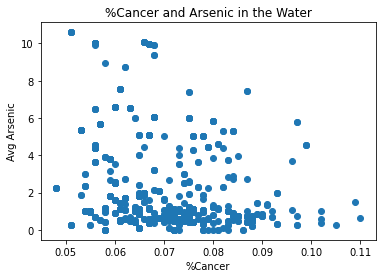

In [59]:
plt.scatter(x = dash_data4["%Cancer Prev"], y= dash_data4["Value"])
plt.title("%Cancer and Arsenic in the Water")
plt.xlabel("%Cancer")
plt.ylabel("Avg Arsenic")

Text(0, 0.5, 'Hazardous Days')

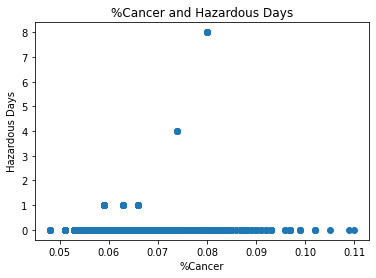

In [60]:
plt.scatter(x = dash_data4["%Cancer Prev"], y= dash_data4["Hazardous Days"])
plt.title("%Cancer and Hazardous Days")
plt.xlabel("%Cancer")
plt.ylabel("Hazardous Days")

In [63]:
formula1='Value ~ %Cancer Prev'
model1 = sm.ols(formula = formula1, data = dash_data4)
fitted = model1.fit()
print(fitted.summary())



AssertionError: ignored

In [64]:
formula1='Value ~ %Cancer Prev'

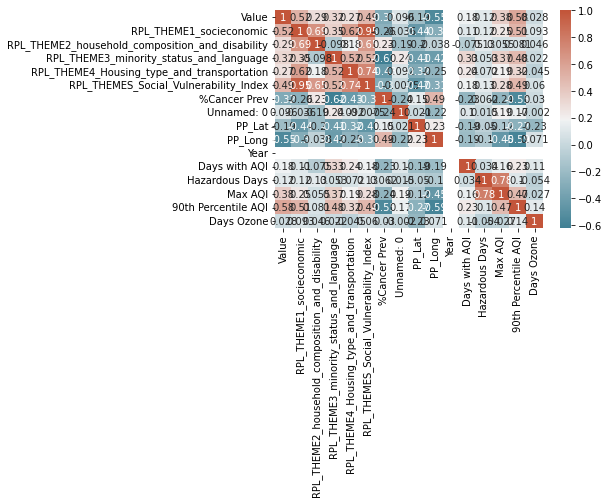

In [70]:
#model1 = sm.ols(formula = formula1, data = dash_data4)# still throwing errors
import seaborn as sns
corr = dash_data4.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220,20,as_cmap=True)) #plot the heatmap

In [74]:
#contingency tables for county fips and % Cancer
dash_cont_table1 = pd.crosstab(index=dash_data4["%Cancer Prev"], columns=dash_data4["Plant primary fuel"], normalize="columns")*100
dash_cont_table1

Plant primary fuel,AB,BIT,BLQ,DFO,JF,KER,LFG,MSW,NG,NUC,...,PUR,RC,RFO,SUB,SUN,WAT,WC,WDL,WDS,WH
%Cancer Prev,,,,,,,,,,,,,,,,,,,,,
0.048,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.744048,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
0.051,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.041667,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
0.053,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,3.125000,0.0,...,0.0,9.090909,0.0,0.000000,75.0,0.0,0.000000,0.0,0.000000,0.0
0.054,0.0,0.0,0.0,0.000000,0.0,0.0,1.086957,0.000000,1.339286,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,2.439024,0.0
0.055,0.0,0.0,0.0,1.063830,100.0,0.0,4.347826,0.000000,7.291667,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
0.056,0.0,8.0,0.0,2.127660,0.0,0.0,8.695652,2.941176,13.392857,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,4.878049,0.0
0.057,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.934524,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,2.439024,0.0
0.058,0.0,12.0,0.0,0.000000,0.0,0.0,2.173913,0.000000,1.934524,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,33.333333,0.0,4.878049,0.0
0.059,0.0,0.0,0.0,1.063830,0.0,0.0,4.347826,0.000000,2.529762,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,2.439024,100.0


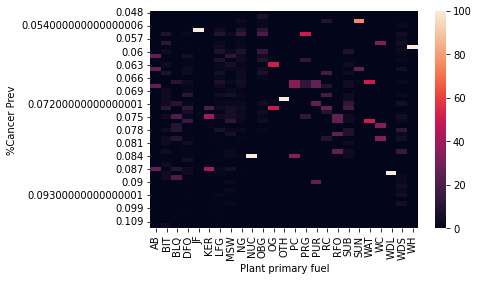

In [75]:
sns.heatmap(dash_cont_table1)

In [ ]:
df_aqi_can= pd.concat([df_aqi_2018,df_cancer], axis=0)
df_aqi_can.sample(20)

,Unnamed: 0,Days with AQI,Hazardous Days,Max AQI,90th Percentile AQI,Days Ozone,cnty_state,CountyFIPS,%Cancer Prev,Data Comment,95% Confidence Interval,Confidence Interval Low,Confidence Interval High,Unnamed: 10,Cnty_ST
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01073,6.9%,NaN,(6.6% - 7.1%),6.6%,7.1%,NaN,"Jefferson, Alabama"
735,735.0,362.0,0.0,119.0,43.0,0.0,"Benton County, Oregon",41003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06043,9.5%,NaN,(9.1% - 10.0%),9.1%,10.0%,NaN,"Mariposa, California"
1197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24009,7.3%,NaN,(7.0% - 7.6%),7.0%,7.6%,NaN,"Calvert, Maryland"
433,433.0,244.0,0.0,143.0,64.0,244.0,"Clinton County, Michigan",26037.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,784.0,345.0,0.0,97.0,44.0,344.0,"Lycoming County, Pennsylvania",42081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27169,7.0%,NaN,(6.6% - 7.3%),6.6%,7.3%,NaN,"Winona, Minnesota"
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38055,9.0%,NaN,(8.5% - 9.5%),8.5%,9.5%,NaN,"McLean, North Dakota"
981,981.0,365.0,0.0,167.0,53.0,0.0,"Lewis County, Washington",53041.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1018,1018.0,365.0,0.0,93.0,54.0,321.0,"Forest County, Wisconsin",55041.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#pull in the fips code file as a dictionary
#all-geocodes-v2020.csv  #filename

import csv 
with open('all-geocodes-v2020.csv', mode='r')as infile:
    reader = csv.reader(infile)
    with open ('all-geocodes-v2020.csv', mode='w')as outfile:
        writer = csv.writer(outfile)
        fips_dict={rows[0]:rows[1]for rows in reader}

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(fips_dict)

NameError: ignored

In [ ]:
import csv
with open("Dashboard_Team_61_Data.csv, mode='r") as infile:
  reader = csv.reader(infile)

FileNotFoundError: ignored

# New Section